Fight style similarity cluster analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

For this particular task we are not going to use the Kaggle UFC dataset that we have been using so far because the stats on the UFC website are better suited for cluster analysis.  
The only problem is that there is no simple way of getting stats for the fighters from the UFC website (no previous web scraping experience and the UFC website is an interactive web application) so we have to create the necessary dataframe manually by insterting all the values ourselves. It is not a huge problem because the number of fighters and attributes is rather small and we also do not have to worry about fixing missing or wrong values either because we have entered all the values ourselves and checked their correctness. In other words the quality of the data is as good as possible.

In [2]:
#Statistics taken from website: https://www.ufc.com/athlete
#Feature list and what they represent
#F1 - Striking accuracy
#F2 - Grappling accuracy 
#F3 - Significant strikes landed (average per minute)
#F4 - Significant strikes absorbed (average per minute)
#F5 - Significant strike defense (%)
#F6 - Takedown defense (%) -
#F7 - Takedown average (average number of takedowns per 15 minutes)
#F8 - Submission avaregae (average number of submission attempts per 15 minutes)
#F9 - Knockdown ratio (how many times on average the fighter knocks down the opoonent each fight)
#F10 - Average fight time (minutes)
#F11 - Strikes standing (% of all strikes)
#F12 - Strikes in clinch (% of all strikes)
#F13 - Strikes on the ground(% of all strikes)
#F14 - Strikes targeting opponent's head(% of all strikes)
#F15 - Strikes targeting opponent's body(% of all strikes)
#F16 - Strikes targeting oponent's legs(% of all strikes)
#F17 - Wins by knockout (% of all wins)
#F18 - Win by decision (% of all wins) 
#F19 - Win submission (% of all wins)

#The fighters were chosen mostly by their name value so that results of cluster analysis would be as interesting as possible
#and as we are creating a dendrogram we have to limit the number of fighters included because the chart would quickly become
#unreadable as the number of fighter increases.
columns = ['Name', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19']
f1 = ['McGregor', 0.49, 0.63, 5.43, 4.40, 0.55, 0.7, 0.75, 0.0, 1.95, 8.33, 0.76, 0.11, 0.13, 0.7, 0.17, 0.13, 0.87, 0.09, 0.04]
f2 = ['Usman', 0.53, 0.51, 4.6, 2.17, 0.6, 1, 3.44, 0.16, 0.41, 16.67, 0.51, 0.18, 0.31, 0.62, 0.29, 0.09, 0.44, 0.5, 0.06]
f3 = ['Adesanya', 0.49, 0, 3.96, 2.4, 0.66, 0.87, 0.0, 0.35, 1.18, 15.88, 0.88, 0.08, 0.04, 0.54, 0.17, 0.28, 0.74, 0.26, 0]
f4 = ['Jon Jones', 0.58, 0.44, 4.30, 2.22, 0.64, 0.95, 1.85, 0.44, 0.22, 15.47, 0.65, 0.17, 0.18, 0.47, 0.25, 0.29, 0.43, 0.3, 0.26]
f5 = ['Nurmagomedov', 0.5, 0.45, 4.29, 1.7, 0.67, 0.85, 5.09, 0.59, 0.2, 13.93, 0.4, 0.04, 0.56, 0.87, 0.08, 0.05, 0.29, 0.36, 0.36]
f6 = ['Saint-Pierre', 0.53, 0.74, 3.83, 1.5, 0.73, 0.84, 3.94, 1.05, 0.39, 15.57, 0.58, 0.07, 0.35, 0.65, 0.19, 0.17, 0.31, 0.46, 0.23]
f7 = ['Whittaker', 0.41, 0.57, 4.82, 3.65, 0.61, 0.84, 0.37, 0.0, 0.75, 12.33, 0.82, 0.09, 0.09, 0.7, 0.13, 0.17, 0.45, 0.32, 0.23]
f8 = ['Volkanovski', 0.57, 0.35, 6.15, 3.14, 0.6, 0.73, 2.16, 0.4, 0.54, 13.92, 0.65, 0.13, 0.22, 0.59, 0.12, 0.29, 0.52, 0.33, 0.14]
f9 = ['Blachowicz', 0.49, 0.52, 3.45, 2.77, 0.54, 0.66, 1.16, 0.27, 0.45, 12.02, 0.71, 0.15, 0.14, 0.66, 0.22, 0.12, 0.27, 0.38, 0.35]
f10 = ['Cormier', 0.54, 0.46, 4.42, 3.95, 0.56, 0.77, 1.81, 0.66, 0.16, 13.03, 0.56, 0.25, 0.19, 0.76, 0.13, 0.11, 0.45, 0.32, 0.23]
f11 = ['Miocic', 0.52, 0.38, 4.95, 3.69, 0.57, 0.73, 2.2, 0, 0.53, 10.65, 0.68, 0.12, 0.19, 0.76, 0.12, 0.12, 0.79, 0.21, 0]
f12 = ['Ferguson', 0.45, 0.43, 5.51, 3.55, 0.64, 0.77, 0.6, 1.49, 0.3, 10.07, 0.89, 0.03, 0.08, 0.64, 0.16, 0.2, 0.5, 0.19, 0.31]
f13 = ['G. Burns', 0.46, 0.37, 3.15, 2.74, 0.57, 0.5, 2.21, 0.71, 0.35, 11.28, 0.67, 0.13, 0.2, 0.59, 0.23, 0.18, 0.33, 0.22, 0.44]
f14 = ['Masvidal', 0.48, 0.52, 4.11, 4.18, 0.67, 0.78, 1.16, 0.51, 0.43, 12.97, 0.7, 0.17, 0.13, 0.62, 0.24, 0.14, 0.46, 0.49, 0.06]
f15 = ['Holloway', 0.45, 0.83, 6.66, 4.45, 0.62, 0.85, 0.24, 0.39, 0.39, 14.13, 0.84, 0.09, 0.07, 0.74, 0.21, 0.05, 0.48, 0.43, 0.1]
f16 = ['Ortega', 0.34, 0.17, 4.07, 7.36, 0.51, 0.56, 0.51, 1.36, 0.51, 11.02, 0.87, 0.08, 0.05, 0.78, 0.18, 0.04, 0.21, 0.29, 0.5]
f17 = ['Yan', 0.46, 0.53, 5.65, 3.15, 0.68, 0.88, 1.73, 0.22, 1.52, 11.53, 0.67, 0.17, 0.15, 0.75, 0.2, 0.04, 0.43, 0.5, 0.07]
f18 = ['D. Figueiredo', 0.52, 0.5, 2.43, 2.15, 0.56, 0.59, 1.86, 2.27, 1.03, 12.12, 0.52, 0.13, 0.35, 0.69, 0.28, 0.02, 0.45, 0.15, 0.4]
fighters = pd.DataFrame(data = [f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13, f14, f15, f16, f17, f18], columns=columns)

Before clustering we will also convert values in each column that are not proportions as of now into scale from 0 to 1 so that some features would not change the distance calculations too much. For example without doing so the distances between the fighters would be affeceted the most by
the average fighting time because the values that it can take (0-25) are so much higher compared to the other values.

In [3]:
fighters['F3'] = fighters['F3'] / max(fighters['F3'])
fighters['F4'] = fighters['F4'] / max(fighters['F4'])
fighters['F7'] = fighters['F7'] / max(fighters['F7'])
fighters['F8'] = fighters['F8'] / max(fighters['F8'])
fighters['F9'] = fighters['F9'] / max(fighters['F9'])
fighters['F10'] = fighters['F10'] / max(fighters['F10'])

In [4]:
#How the custom dataset looks after converting values in every column
fighters.head(5)

,Name,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19
0,McGregor,0.49,0.63,0.815315,0.597826,0.55,0.70,0.147348,0.000000,1.000000,0.499700,0.76,0.11,0.13,0.70,0.17,0.13,0.87,0.09,0.04
1,Usman,0.53,0.51,0.690691,0.294837,0.60,1.00,0.675835,0.070485,0.210256,1.000000,0.51,0.18,0.31,0.62,0.29,0.09,0.44,0.50,0.06
2,Adesanya,0.49,0.00,0.594595,0.326087,0.66,0.87,0.000000,0.154185,0.605128,0.952609,0.88,0.08,0.04,0.54,0.17,0.28,0.74,0.26,0.00
3,Jon Jones,0.58,0.44,0.645646,0.301630,0.64,0.95,0.363458,0.193833,0.112821,0.928014,0.65,0.17,0.18,0.47,0.25,0.29,0.43,0.30,0.26
4,Nurmagomedov,0.50,0.45,0.644144,0.230978,0.67,0.85,1.000000,0.259912,0.102564,0.835633,0.40,0.04,0.56,0.87,0.08,0.05,0.29,0.36,0.36


Creating dendrogram with complete linkage

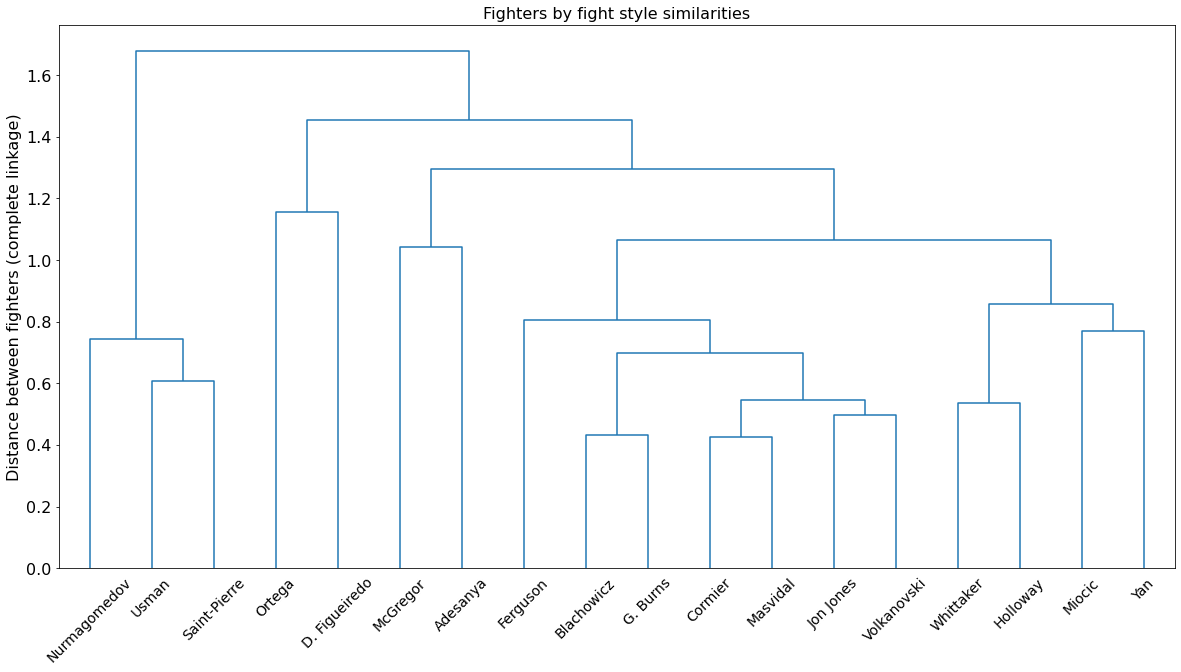

In [8]:
from scipy.cluster import hierarchy
plt.figure(figsize=(20, 10))
complete = hierarchy.linkage(fighters.drop(columns='Name'), 'complete')
plt.title('Fighters by fight style similarities', fontsize = 16)
plt.ylabel('Distance between fighters (complete linkage)', fontsize = 16)
cluster = hierarchy.dendrogram(complete, labels=fighters['Name'].tolist(), color_threshold=0)
plt.xticks(rotation = 45, fontsize = 14)
plt.yticks(fontsize = 16)
plt.savefig('../../data/cluster-analysis.png')
plt.show()

Creating a scatterplot with principal component analysis

In [6]:
from sklearn.decomposition import PCA
pca = pd.DataFrame(PCA(n_components=2).fit_transform(fighters.iloc[:, 1:]))
names = fighters['Name']
pca.columns = ['PCA1', 'PCA2']
pca['Name'] = names
pca

,PCA1,PCA2,Name
0,-0.757651,-0.233499,McGregor
1,0.367984,-0.471554,Usman
2,-0.523690,-0.087506,Adesanya
3,0.177517,-0.127261,Jon Jones
4,0.831121,-0.225816,Nurmagomedov
5,0.630118,-0.139287,Saint-Pierre
6,-0.324957,-0.089771,Whittaker
7,-0.004484,-0.174477,Volkanovski
8,0.044386,0.091931,Blachowicz
9,0.140417,0.053920,Cormier


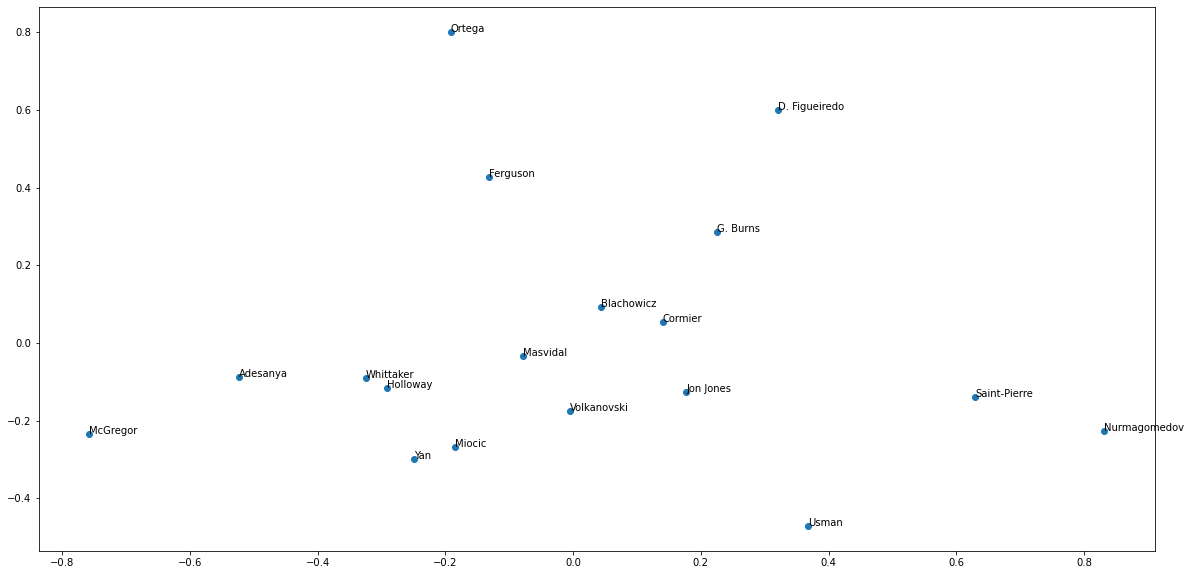

In [7]:
plt.figure(figsize=(20, 10))
plt.scatter(pca['PCA1'], pca['PCA2'])
for i in range(len(names)):
    plt.annotate(names.iloc[i], (pca['PCA1'].iloc[i], pca['PCA2'].iloc[i]))
plt.show()